# Logistic Regression


* The Logistic Regression Algorithm deals in discrete values whereas the Linear Regression Algorithm handles predictions in continuous values. This means that Logistic Regression is a better option for binary classification. An event in Logistic Regression is classified as 1 if it occurs and it is classified as 0 otherwise. Hence, the probability of a particular event occurrence is predicted based on the given predictor variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
721,722,0,3,"Jensen, Mr. Svend Lauritz",male,17.0,1,0,350048,7.0542,NaN,S
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# There should be no missing Entries,Categorical data for algorithm


# EDA-(Exploratory Data Analysis)

In [6]:
# Missing Data Identification
pd.isnull(df)# This will tell us the missing data in our DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
100*pd.isnull(df).sum()/len(df) #Getting out Percentage of missing enteries in each column

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Refer Online Resources for handling Missing data

# Missing Data Strategy
* - Identify Missing Data 
* - Discard the columns having too much of missing data (>25%)
* - Discard the rows having missing entries, if the missing enteries are too less(<5%)
* - Treat/Input the missing entries in columns
*       * Try to fill fake enteries which doesn't impact overall data
*       * fill using mean values
*       * fill using some inputers 


<AxesSubplot:>

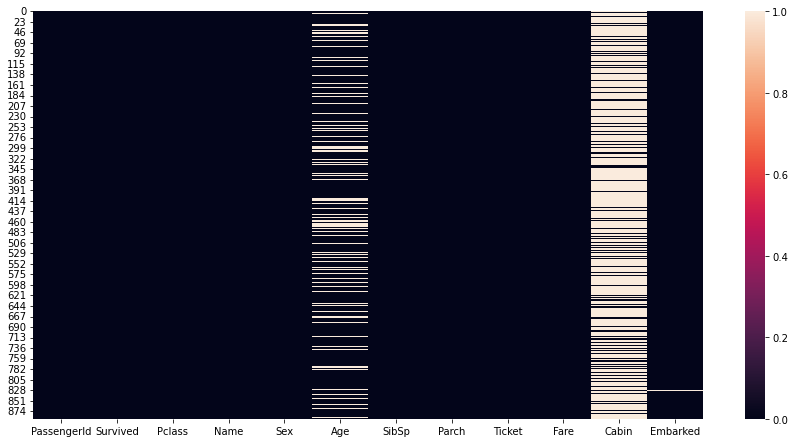

In [8]:
plt.figure(figsize=(15,7.5))
sns.heatmap(pd.isnull(df))
#These White bars in age and cabin are filled with empty value

In [9]:
df.drop('Cabin',axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='Age'>

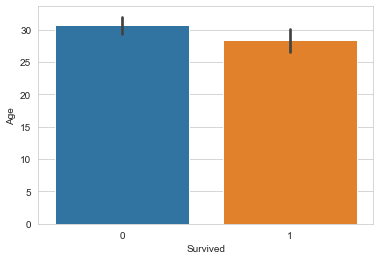

In [11]:
sns.set_style("whitegrid")
sns.barplot(data=df,x="Survived",y='Age')

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df['Age'].fillna(df['Age']).mean()
# This will fill mean value of age at every missing enteries using function (fillna)
#This is the easiest way of filling empty values

29.69911764705882

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

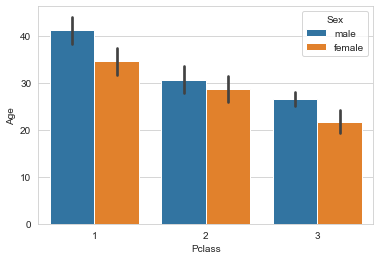

In [15]:
sns.set_style("whitegrid")
sns.barplot(data=df,x="Pclass",y='Age',hue='Sex')

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# EDA

In [17]:
target_cols= 'Survived'
cat_cols=['Pclass','Sex','Embarked']
num_cols=['Age' ,'SibSp','Parch','Fare']
drop_cols=['PassengerId','Name','Ticket']


# Univariate Analysis

In [18]:
df.columns.nunique()

11

In [19]:
df['PassengerId'].nunique()

891

In [20]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

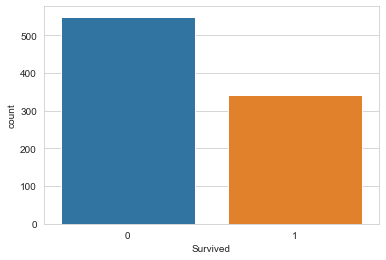

In [21]:
sns.countplot(data=df,x='Survived')

In [22]:
def cat_analyze(col):
    print(df[col].value_counts().sort_index())
    sns.countplot(data=df,x=col)
    plt.show()
    

0    549
1    342
Name: Survived, dtype: int64


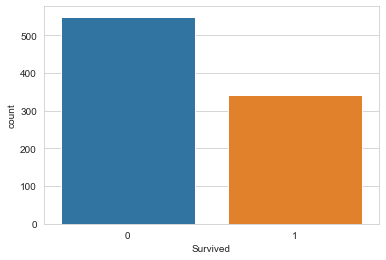

In [23]:
cat_analyze('Survived')

1    216
2    184
3    491
Name: Pclass, dtype: int64


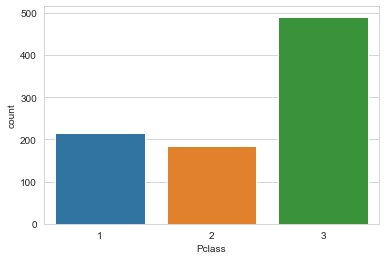

In [24]:
cat_analyze("Pclass")

1    216
2    184
3    491
Name: Pclass, dtype: int64


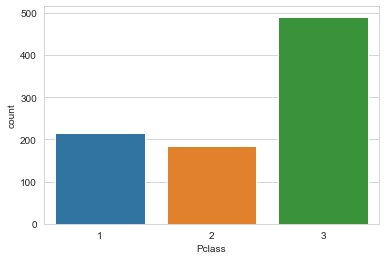

female    314
male      577
Name: Sex, dtype: int64


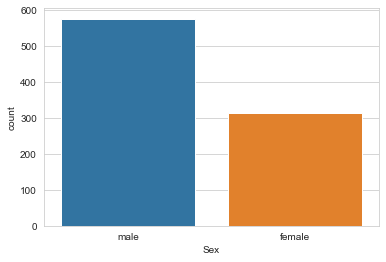

C    168
Q     77
S    644
Name: Embarked, dtype: int64


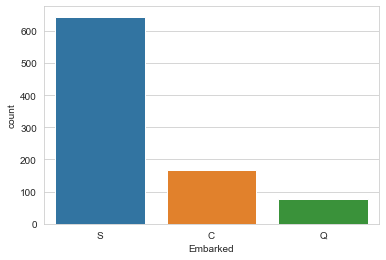

In [25]:
for col in cat_cols:
    cat_analyze(col)


In [26]:
def num_analyze(col):
    print((col))
    sns.distplot(df[col])
    plt.show()
    

Age


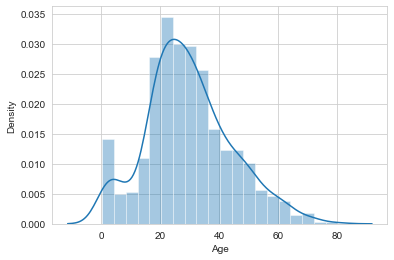

SibSp


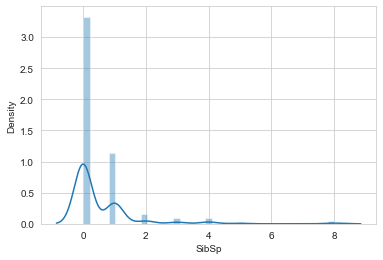

Parch


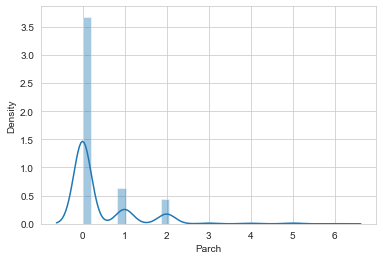

Fare


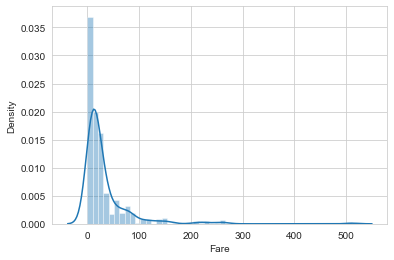

In [27]:
for col in num_cols:
    num_analyze(col)

# Bivariate Analysis

In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


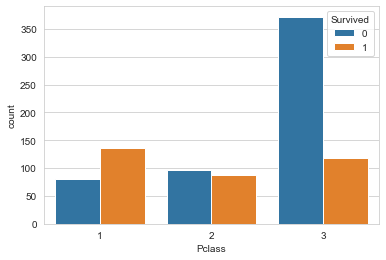

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


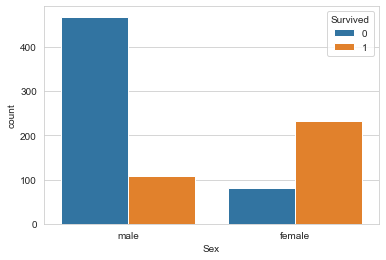

Embarked
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Embarked, dtype: int64


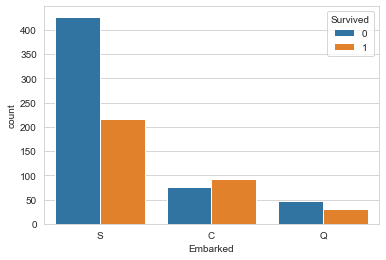

In [29]:
def cat_bivariate(col):
    print(col)
    print(df.groupby(target_cols)[col].value_counts().sort_index())
    sns.countplot(data=df,x=col,hue=target_cols)
    plt.show()
for col in cat_cols:
    cat_bivariate(col)

Age


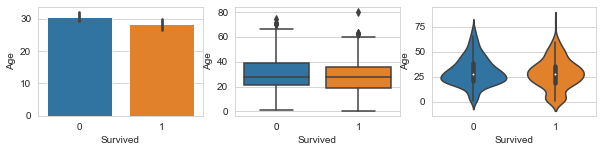

SibSp


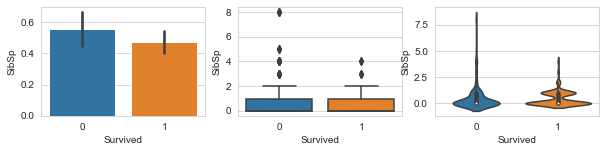

Parch


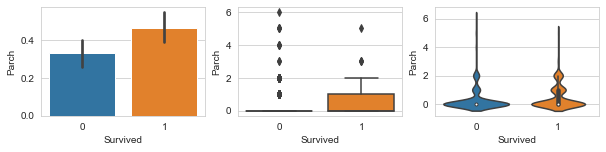

Fare


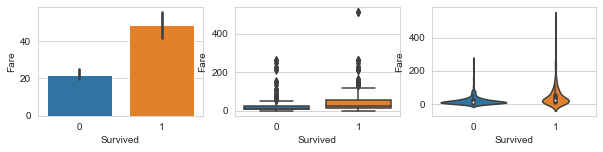

In [30]:
def num_bivariate(col):
    print(col)
    plt.figure(figsize=(10,2))
    plt.subplot(1,3,1)
    sns.barplot(data=df,x=target_cols,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=target_cols,y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=target_cols,y=col)
    plt.show()
for col in num_cols:
    num_bivariate(col)

<AxesSubplot:>

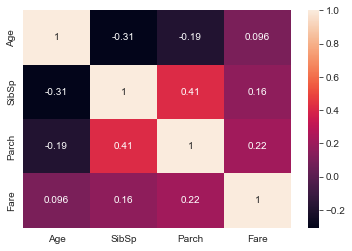

In [31]:
sns.heatmap(df[num_cols].corr(),annot=True)

# MultiVariate Analysis

In [32]:
from random import choice
p_list ={'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'}

TypeError: 'set' object is not subscriptable

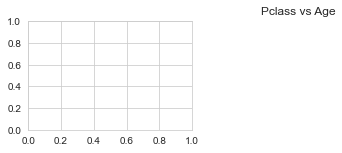

In [33]:

for col in cat_cols:
    if col == target_cols:
        continue
    for ncol in num_cols:
        plt.figure(figsize=(10,2))
        plt.suptitle(f'{col} vs {ncol}')
        plt.subplot(1,3,1)
        sns.boxplot(data=df,x=col,y=ncol,hue=target_cols,palette=choice(p_list))
        plt.subplot(1,3,2)
        sns.violinplot(data=df,x=col,y=ncol,hue=target_cols,palette=choice(p_list))
        plt.subplot(1,3,3)
        sns.barplot(data=df,x=col,y=ncol,hue=target_cols,palette=choice(p_list))
        plt.show()

In [ ]:
df.drop(drop_cols,axis=1,inplace=True)

In [ ]:
#Inpute the Fake Enteries in a missing age 
def age_inputer(data):
    age=data['Age']
    pclass= data['Pclass']
    sex=data['Sex']

    if pd.isnull(age):
        return df['Age'][(df['Passenger']==pclass)&(df['Sex']==sex)].mean()
    else:
        return age
df["Age"] = df.apply(age_inputer,axis=1)

KeyError: 'Passenger'

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot:>

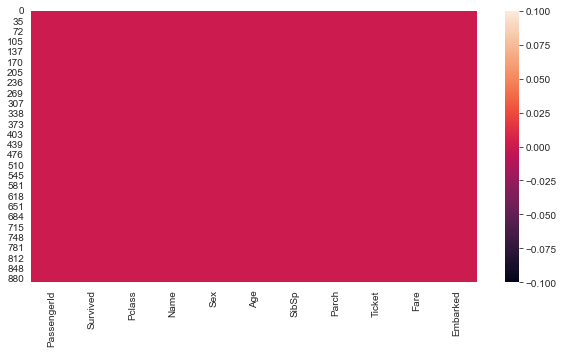

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.isnull(df))

In [ ]:
#Dropping missing enteries which were vey less (inembarked Collumn)
df.dropna(axis=0,inplace=True)

In [ ]:
100*pd.isnull(df).sum()/len(df)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

# String Data Preprocessing/ Creating Dummy for String

In [ ]:
data=pd.get_dummies(df).drop('Sex_female',axis=1)

In [ ]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [ ]:
target = data[target_cols]
features = data.drop(target_cols,axis=1)


In [ ]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


# Why we decided Logistic Regression 
1. intitally we thought of doing with pairplot, but since its a categorical data in target, its not helpfull
2. Since its <b>Binary categorical target </b>and features are mixtures of<b> numberical</b> and<b> categorical</b> both , then i can think of logistic regression (Classification)


# Machine Learning Template
# Data Splitting 

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.25,random_state=101)

# Model Creation & Training

In [ ]:
from sklearn.linear_model import LogisticRegression


model=LogisticRegression()
model.fit(xtrain,ytrain)


LogisticRegression()

# Model Evaluation

In [ ]:
print(round(100*model.score(xtest,ytest)),'%')

80 %


In [ ]:
# Confusion Matrix and Classification Report 
from sklearn.metrics import confusion_matrix,classification_report
ytest_pred= model.predict(xtest)
sns.heatmap(confusion_matrix(xtest,ytest_pred),annot=True,fmt='d')
print(classification_report(ytest,ytest_pred))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets